## Customer Segmentation of Retail Customers

The objective of this project has been to Identify customer segments based on the overall buying behaviour of the Client.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns           #importing liabraries

In [2]:
data = pd.read_csv("OnlineRetail.csv", encoding= 'latin1')
data.head()      #reading Dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
data.shape

(541909, 8)

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Part A - EDA

In [7]:
data.dtypes    #checking data types

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
data.columns #checking all column names

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
data = data.drop(['Description'], axis = 1)  #droping 'Description' column.

In [10]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df = data.rename(columns = {'StockCode':'SKU'})  #changing column name 'StockCode'- SKU(Stock keeping Unit)
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
print("Data Type of Columns : ")
df.dtypes

Data Type of Columns : 


InvoiceNo       object
SKU             object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In the above data type, all column's data types are correct instead of InvoiceDate, hence we need to change it to datetime.

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes   #changing datatype of column 'InvoiceDate'

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
#seperating Date & Time from InvoiceDate column

df['Dates'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.time
df.head()                                              

#df['Date'] = [d.date() for d in df['InvoiceDate']]
#df['Time'] = [d.time() for d in df['InvoiceDate']]
#df['InvoiceDate']=df['InvoiceDate'].apply(lambda x : str(x).split(" "))

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [15]:
df.dtypes 

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Dates                  object
Time                   object
dtype: object

In [16]:
df['Dates'] = pd.to_datetime(df['Dates'])
df.dtypes    #changing Date column dataype to datetimes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Dates          datetime64[ns]
Time                   object
dtype: object

In [17]:
pd.DataFrame(df.isnull().sum(), columns = ['Null Values'])  #Checking null values

,Null Values
InvoiceNo,0
SKU,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Dates,0
Time,0


In [18]:
df = df.dropna(subset = ['CustomerID'])
df.head()                                 #droping null values from dataset of column 'CustomerID'

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [19]:
df.shape   #checking data shape

(406829, 9)

In [20]:
df.dtypes  #data tyeps

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Dates          datetime64[ns]
Time                   object
dtype: object

In [21]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day     #extracting year, month and day from InvoiceDate column

In [22]:
df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Year,Month,Day
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1


In [23]:
df.shape #checking data shape

(406829, 12)

In [24]:
#checking unique values count of few columns

x = len(df['SKU'].unique())
y = len(df['InvoiceNo'].unique())
z = len(df['CustomerID'].unique())
a = len(df['Country'].unique())

print("There are", x, "number of different SKU")
print("\nThere are", y, "number of different InvoiceNo")
print("\nThere are", z, "number of different CustomerID")
print("\nThere are", a, "number of different Country") 

There are 3684 number of different SKU

There are 22190 number of different InvoiceNo

There are 4372 number of different CustomerID

There are 37 number of different Country


In [25]:
# Revenue by month

df['Revenue'] = df['Quantity']*df['UnitPrice']
df.head()      #it will give us revenue for each rows

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Year,Month,Day,Revenue
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34


In [26]:
df_revenue = df.groupby('Month')['Revenue'].sum().reset_index()
df_revenue   #creating new Datframe for Revenue by month

,Month,Revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


Text(0.5, 1.0, 'Revenue per Month')

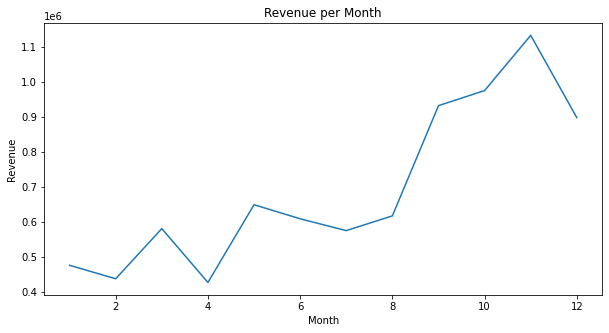

In [27]:
#visualisation - Revenue by month
#Line Graph to capture the monthly revenue

plt.figure(figsize=(10,5))
rm = sns.lineplot(x = 'Month', y = 'Revenue', data = df_revenue, sort = False)
rm.set_title('Revenue per Month')   

In [28]:
#cummulative Revenue

df_cum_rev = df.groupby('Month')['Revenue'].sum().cumsum().reset_index()
df_cum_rev

,Month,Revenue
0,1,475074.380
1,2,911620.530
2,3,1491585.140
3,4,1917632.991
4,5,2565884.071
5,6,3173897.231
6,7,3748135.712
7,8,4364503.712
8,9,5295944.084
9,10,6270547.674


Text(0.5, 1.0, 'cumulative Revenue per Month')

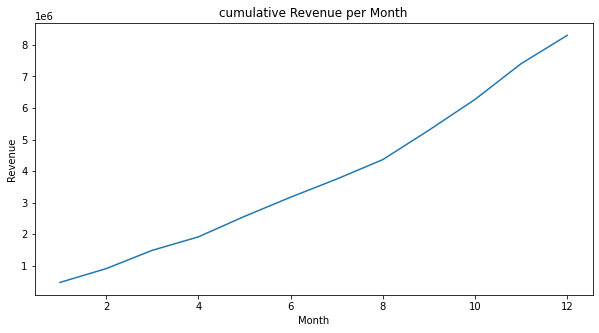

In [29]:
plt.figure(figsize=(10,5))
cr = sns.lineplot(x = 'Month', y = 'Revenue', data = df_cum_rev, sort = False)
cr.set_title('cumulative Revenue per Month')  #visualisation

In [30]:
# monthly growth rate

In [31]:
df_revenue['MonthGrowth'] = df_revenue['Revenue'].pct_change()
df_revenue

,Month,Revenue,MonthGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [32]:
df_revenue = df_revenue.loc[df_revenue['Month']!=12]

In [33]:
df_revenue.shape  #checking shape

(11, 3)

In [34]:
df_revenue

,Month,Revenue,MonthGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [35]:
df_revenue['MonthGrowth'] = df_revenue['MonthGrowth'].fillna(0)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_revenue

,Month,Revenue,MonthGrowth
0,1,475074.380,0.000000
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


Text(0.5, 1.0, 'Monthly Growth Rate')

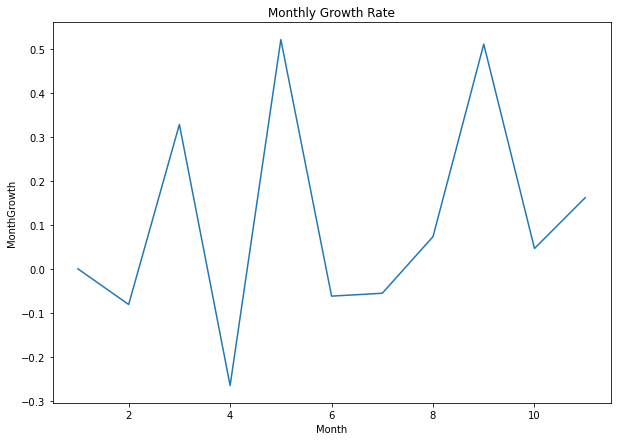

In [37]:
#visualisation - Montly Growth Rate
plt.figure(figsize=(10,7))
mgr = sns.lineplot(x = 'Month', y = 'MonthGrowth', data = df_revenue, sort = False)
mgr.set_title('Monthly Growth Rate')  

In [38]:
#revenue by country

In [39]:
df_revenue = df.groupby('Country')['Revenue'].sum().round().reset_index()
df_revenue  

,Country,Revenue
0,Australia,137077.0
1,Austria,10154.0
2,Bahrain,548.0
3,Belgium,40911.0
4,Brazil,1144.0
5,Canada,3666.0
6,Channel Islands,20086.0
7,Cyprus,12946.0
8,Czech Republic,708.0
9,Denmark,18768.0


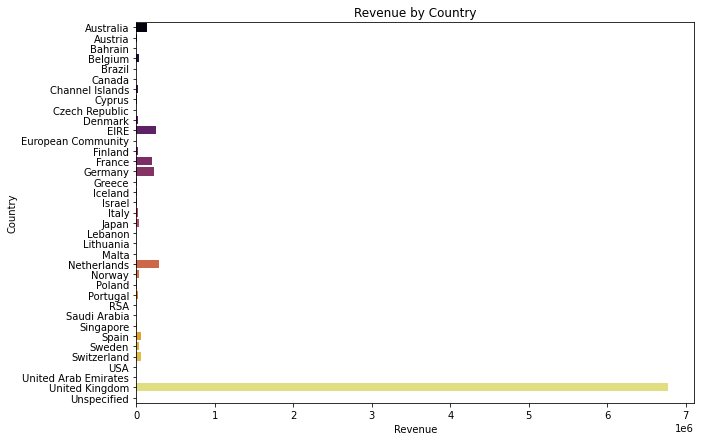

In [40]:
#Visualization - Revenue by Country

plt.figure(figsize=(10,7))
sns.barplot(x = 'Revenue', y = 'Country', data = df_revenue, palette = 'inferno')
plt.title('Revenue by Country')
plt.show()

In [41]:
# Total active customer

In [42]:
# monthly active customer

df_monthly_active = df.groupby('Month')['CustomerID'].nunique().reset_index()
df_monthly_active

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


Text(0.5, 1.0, 'Monthly Active customer')

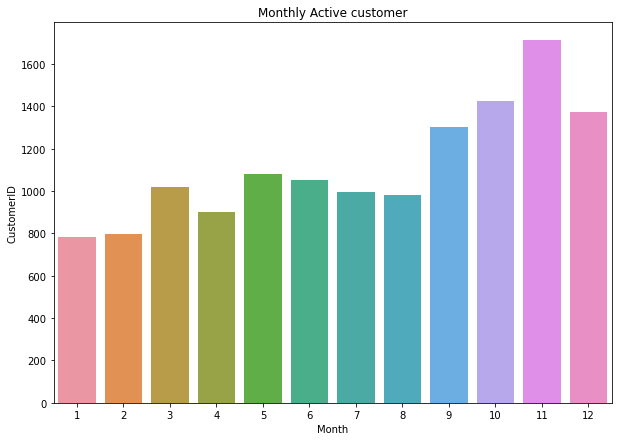

In [43]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'CustomerID', data = df_monthly_active)

ax.set_title('Monthly Active customer')

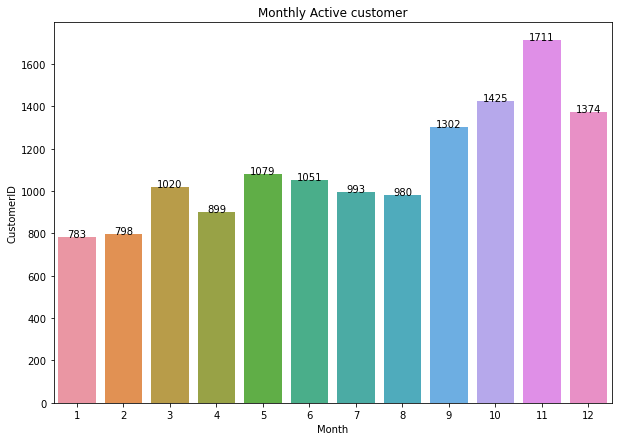

In [44]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'CustomerID', data = df_monthly_active)

ax.set_title('Monthly Active customer')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), y = height +0.2, ha = 'center', s = '{:.0f}'.format(height))

In [45]:
#country wise active customer

df_country_active = df.groupby('Country')['CustomerID'].nunique().reset_index()
df_country_active

,Country,CustomerID
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1
5,Canada,4
6,Channel Islands,9
7,Cyprus,8
8,Czech Republic,1
9,Denmark,9


In [46]:
#orders Monthly

df_orders_monthly = df.groupby('Month')['InvoiceNo'].nunique().reset_index()
df_orders_monthly  

,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


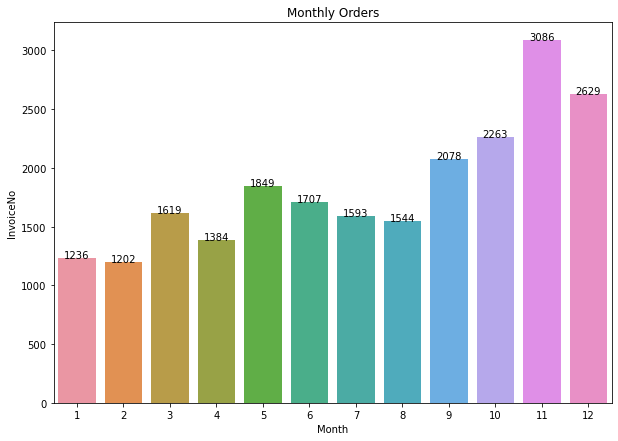

In [47]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'InvoiceNo', data = df_orders_monthly)

ax.set_title('Monthly Orders')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), y = height +0.2, ha = 'center', s = '{:.0f}'.format(height))

In [48]:
# country wise orders

In [49]:
df_orders_country = df.groupby('Country')['InvoiceNo'].nunique().reset_index()
df_orders_country

,Country,InvoiceNo
0,Australia,69
1,Austria,19
2,Bahrain,2
3,Belgium,119
4,Brazil,1
5,Canada,6
6,Channel Islands,33
7,Cyprus,20
8,Czech Republic,5
9,Denmark,21


In [97]:
#total order line

total_orderline = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
total_orderline

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [51]:
#Total SKU (distinct count of Stock code) by country and month

#monthly SKU count

df_SKU_month = df.groupby('Month')['SKU'].nunique().reset_index()
df_SKU_month

,Month,SKU
0,1,2154
1,2,2144
2,3,2244
3,4,2228
4,5,2232
5,6,2345
6,7,2370
7,8,2369
8,9,2552
9,10,2663


In [52]:
#country wise SKU count

df_SKU_country = df.groupby('Country')['SKU'].nunique().reset_index()
df_SKU_country

,Country,SKU
0,Australia,600
1,Austria,307
2,Bahrain,16
3,Belgium,778
4,Brazil,32
5,Canada,147
6,Channel Islands,430
7,Cyprus,498
8,Czech Republic,25
9,Denmark,251


In [53]:
#Average Revenue per Month

df_avrg_revenue = df.groupby('Month')['Revenue'].mean().reset_index()
df_avrg_revenue

,Month,Revenue
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


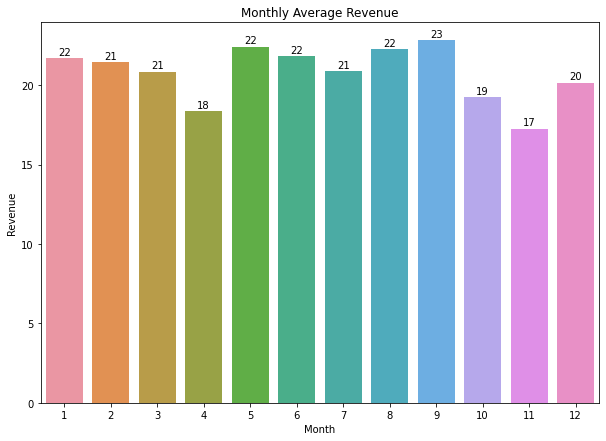

In [54]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'Revenue', data = df_avrg_revenue)

ax.set_title('Monthly Average Revenue')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2), y = height +0.2, ha = 'center', s = '{:.0f}'.format(height))

In [55]:
#Finding New Customer

In [56]:
df['YearMonth'] = df['Year'].map(str) + '' + df['Month'].map(str) 

In [57]:
customer_fist_purchase = df.groupby('CustomerID').InvoiceDate.min().reset_index()
customer_fist_purchase.columns = ['CustomerID','FirstPurchaseDate']
customer_fist_purchase['FirstPurchaseYearMonth'] = customer_fist_purchase['FirstPurchaseDate'].map(lambda date: 100*date.year + date.month)

In [58]:
new_df = pd.merge(df, customer_fist_purchase, on='CustomerID')
new_df['Date'] = pd.to_datetime(new_df.InvoiceDate.dt.date)
new_df.set_index('Date', inplace=True)
new_df.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Year,Month,Day,Revenue,YearMonth,FirstPurchaseDate,FirstPurchaseYearMonth
Date,,,,,,,,,,,,,,,,
2010-12-01,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30,201012,2010-12-01 08:26:00,201012
2010-12-01,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012
2010-12-01,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00,201012,2010-12-01 08:26:00,201012
2010-12-01,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012
2010-12-01,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012


In [59]:
new_df['UserType'] = 'New'
new_df

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Year,Month,Day,Revenue,YearMonth,FirstPurchaseDate,FirstPurchaseYearMonth,UserType
Date,,,,,,,,,,,,,,,,,
2010-12-01,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,15.00,201112,2011-12-09 12:16:00,201112,New
2011-12-09,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,201112,2011-12-09 12:16:00,201112,New
2011-12-09,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,201112,2011-12-09 12:16:00,201112,New


In [60]:
new_df["YearMonth"] = new_df["YearMonth"].astype(str).astype(int)
new_df['YearMonth'].dtypes

dtype('int32')

In [61]:
new_df.loc[new_df['YearMonth']>new_df['FirstPurchaseYearMonth'],'UserType'] = 'Existing'

In [62]:
new_df

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Year,Month,Day,Revenue,YearMonth,FirstPurchaseDate,FirstPurchaseYearMonth,UserType
Date,,,,,,,,,,,,,,,,,
2010-12-01,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-09,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,15.00,201112,2011-12-09 12:16:00,201112,New
2011-12-09,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,201112,2011-12-09 12:16:00,201112,New
2011-12-09,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,2011-12-09,12:16:00,2011,12,9,10.20,201112,2011-12-09 12:16:00,201112,New


In [63]:
new_df['UserType'].unique()

array(['New', 'Existing'], dtype=object)

In [64]:
new_df['Revenue'] = new_df['Quantity']*new_df['UnitPrice']
new_df.head() 

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Year,Month,Day,Revenue,YearMonth,FirstPurchaseDate,FirstPurchaseYearMonth,UserType
Date,,,,,,,,,,,,,,,,,
2010-12-01,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,15.30,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,22.00,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New
2010-12-01,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,1,20.34,201012,2010-12-01 08:26:00,201012,New


In [65]:
customer_ = pd.DataFrame(new_df.groupby([new_df.index.year,new_df.index.month, new_df.UserType])['Revenue'].sum())
customer_.index.set_names(['Year', 'Month', 'UserType'], inplace = True)

In [66]:
# total revenue per month by day for new and existing customer
customer_

Revenue
Year Month UserType            
2010 12    New       554604.020
2011 1     New       475074.380
     2     New       436546.150
     3     New       579964.610
     4     New       426047.851
     5     New       648251.080
     6     New       608013.160
     7     New       574238.481
     8     New       616368.000
     9     New       931440.372
     10    Existing  819672.900
           New       154930.690
     11    Existing  998176.360
           New       134231.380
     12    Existing  315729.630
           New        26776.750

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

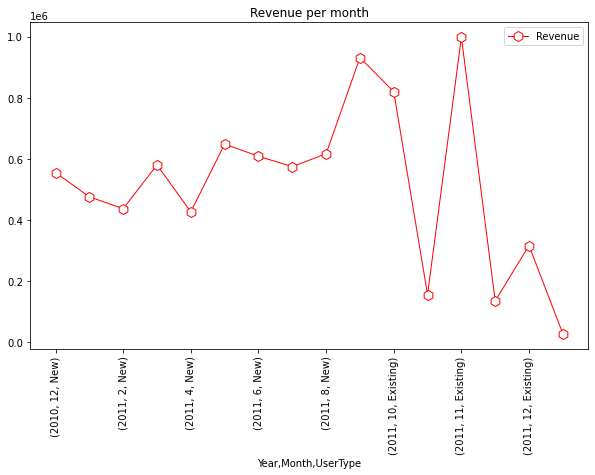

In [67]:
# Line Graph to capture the monthly revenue

customer_.plot.line(y='Revenue', title='Revenue per month',color = 'r',marker='h', markersize=10, linewidth=1,markerfacecolor='white',figsize=(10, 6));
plt.xticks(rotation=90)

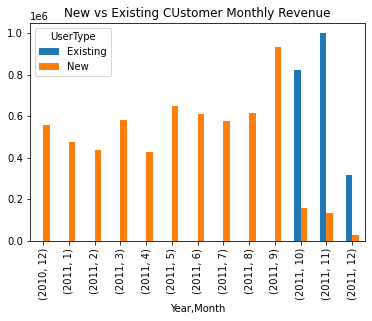

In [68]:
# Plot new vs existing customers
customer_.unstack().plot.bar( y='Revenue', title='New vs Existing CUstomer Monthly Revenue', rot=90);

In [69]:
# monthly retention rate

In [70]:
df_purchase = new_df.groupby(['CustomerID', 'Month'])['Revenue'].sum().reset_index()
df_purchase

,CustomerID,Month,Revenue
0,12346.0,1,0.00
1,12347.0,1,475.39
2,12347.0,4,636.25
3,12347.0,6,382.52
4,12347.0,8,584.91
...,...,...,...
13410,18283.0,10,114.65
13411,18283.0,11,651.56
13412,18283.0,12,208.00
13413,18287.0,5,765.28


In [100]:
customer_Retention_rate = pd.crosstab(df_purchase['CustomerID'],df_purchase['Month']).reset_index()
customer_Retention_rate

Month,CustomerID,1,2,3,4,5,6,7,8,9,10,11,12
0,12346.0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,0,0,1,0,0,0,0,1,0,0,1
3,12349.0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,0,0,1,0,0,0,0,0,0,0,0,0
4368,18281.0,0,0,0,0,0,1,0,0,0,0,0,0
4369,18282.0,0,0,0,0,0,0,0,1,0,0,0,1
4370,18283.0,1,1,0,1,1,1,1,0,1,1,1,1


## Part B

### RMF Modeling:

In [72]:
#Recency Score

In [73]:
# Generate new dataframe based on unique CustomerID to keep track of RFM scores
customer = pd.DataFrame(new_df['CustomerID'].unique())
customer.columns = ['CustomerID']

In [74]:
# Generate new data frame based on latest Invoice date from new_df dataframe per Customer (groupby = CustomerID)
recency = new_df.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID','LastPurchaseDate']

# Set observation point as the last invoice date in the dataset
LastInvoiceDate = recency['LastPurchaseDate'].max()

# Generate Recency in days by subtracting the Last Purchase date for each customer from the Last Invoice Date
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days

In [75]:
# Consolidate to customer DataFrame
customer = pd.merge(customer, recency[['CustomerID','Recency']], on='CustomerID')
customer.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,329


In [76]:
# Review statistics around Recency score 
customer.describe()

,CustomerID,Recency
count,4372.000000,4372.000000
mean,15299.677722,91.047118
std,1722.390705,100.765435
min,12346.000000,0.000000
25%,13812.750000,16.000000
50%,15300.500000,49.000000
75%,16778.250000,142.000000
max,18287.000000,373.000000


In [77]:
#Frequency Score

In [78]:
# Count number of invoices per CustomerID and store in new frequency Dataframe
frequency = new_df.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

# Consolidate Frequency to existing Customer DataFrame
customer = pd.merge(customer, frequency, on='CustomerID')

In [79]:
customer.head()

,CustomerID,Recency,Frequency
0,17850.0,301,312
1,13047.0,31,196
2,12583.0,2,251
3,13748.0,95,28
4,15100.0,329,6


In [80]:
customer.describe()

,CustomerID,Recency,Frequency
count,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294
std,1722.390705,100.765435,232.471608
min,12346.000000,0.000000,1.000000
25%,13812.750000,16.000000,17.000000
50%,15300.500000,49.000000,42.000000
75%,16778.250000,142.000000,102.000000
max,18287.000000,373.000000,7983.000000


In [82]:
#Monetery Value Score (Revenue)

# Revenue per transaction has already been calculated
# Grouping revenue per Customer ID
revenue = new_df.groupby('CustomerID').Revenue.sum().reset_index()

# Consolidate Revenue to existing Customer DataFrame
customer = pd.merge(customer, revenue, on='CustomerID')
customer.head()

,CustomerID,Recency,Frequency,Revenue
0,17850.0,301,312,5288.63
1,13047.0,31,196,3079.10
2,12583.0,2,251,7187.34
3,13748.0,95,28,948.25
4,15100.0,329,6,635.10


In [83]:
customer.describe()

,CustomerID,Recency,Frequency,Revenue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294,1898.459701
std,1722.390705,100.765435,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,16.000000,17.000000,293.362500
50%,15300.500000,49.000000,42.000000,648.075000
75%,16778.250000,142.000000,102.000000,1611.725000
max,18287.000000,373.000000,7983.000000,279489.020000


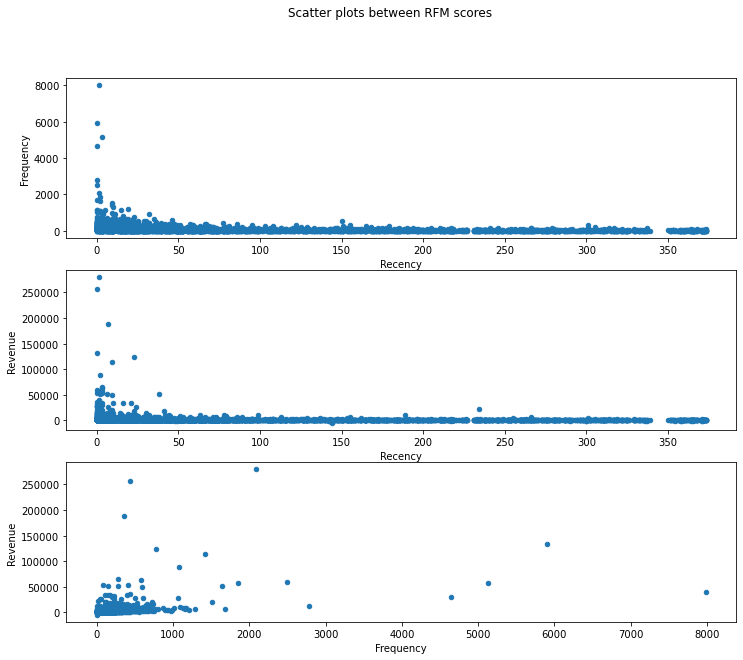

In [84]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Scatter plots between RFM scores')
customer.plot.scatter(x = 'Recency', y = 'Frequency', ax = ax1, figsize = (12,10));
customer.plot.scatter(x = 'Recency', y = 'Revenue', ax = ax2);
customer.plot.scatter(x = 'Frequency', y = 'Revenue', ax = ax3);

## K-Means Clustering

In [85]:
# Creating input features variable
X = customer.loc[:, 'Recency':'Revenue']
X.head()

,Recency,Frequency,Revenue
0,301,312,5288.63
1,31,196,3079.10
2,2,251,7187.34
3,95,28,948.25
4,329,6,635.10


In [86]:
# Number of clusters - Initially we are attempting based on the 3 Segments (worst, Mid, best)
k=3

In [87]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [88]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0)
model.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [89]:
# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [0 1 1 ... 1 1 1]


In [90]:
#Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 1.54036113e+00 -2.81109603e-01 -1.74518264e-01]
 [-5.14052790e-01  5.08567572e-02  6.34396854e-03]
 [-8.63957712e-01  1.18416391e+01  1.42137753e+01]]


In [91]:
centroids[:,0]

array([ 1.54036113, -0.51405279, -0.86395771])

In [92]:
# Append clusters to input features table
Xstd['clusters'] = cluster_labels
Xstd.head()

,Recency,Frequency,Revenue,clusters
0,2.083819,0.941929,0.412510,0
1,-0.595978,0.442886,0.143658,1
2,-0.883808,0.679501,0.643541,1
3,0.039233,-0.279865,-0.115620,1
4,2.361724,-0.374511,-0.153723,0


In [99]:
#saving model
import pickle
pickle.dump(Xstd,open('model.pkl','wb'))

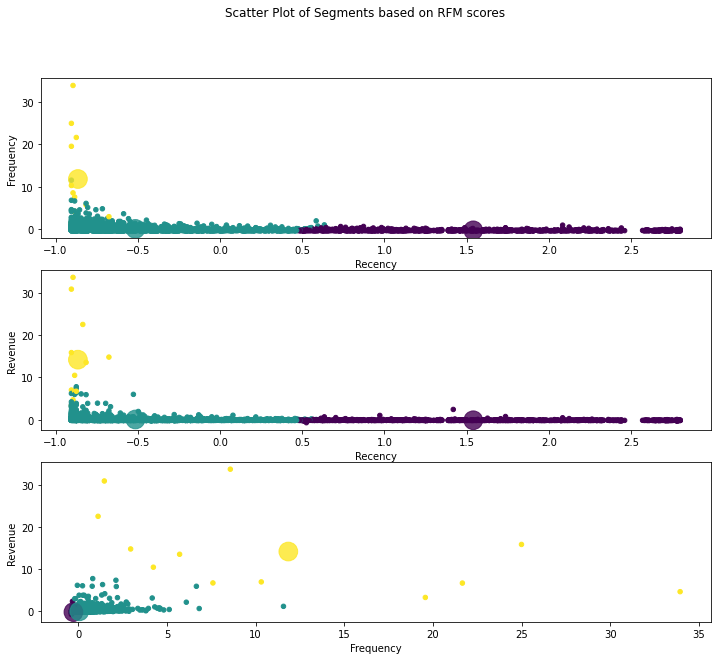

In [93]:
# Scatter plot of data coloured by cluster they belong to
fig, (ax4, ax5, ax6) = plt.subplots(3);
fig.suptitle('Scatter Plot of Segments based on RFM scores');

Xstd.plot.scatter(x = 'Recency', y = 'Frequency', c=Xstd['clusters'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

Xstd.plot.scatter(x = 'Recency', y = 'Revenue', c=Xstd['clusters'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

Xstd.plot.scatter(x = 'Frequency', y = 'Revenue', c=Xstd['clusters'], colormap='viridis', ax=ax6, colorbar=False);
ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');